This is an example of the application of a restricted boltzmann machine (RBM). We let it learn on data where the visible units have certain firing rates. To test if the RBM learned correctly we sample data for it after training and compare the firing rates of the true data and the inferred data.

In [1]:
from RBM_relu_autograd import ReLuRBM
import torch
import matplotlib.pyplot as plt

100%|██████████| 10/10 [00:05<00:00,  1.99it/s]


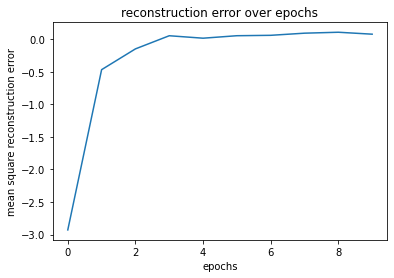

In [2]:
# simulation parameters
n_visible = 100
n_hidden = 10
n_batches = 500

# initialize some random firing rates
firing_rates = torch.rand(n_visible)

# create data based on the firing rates
data = torch.rand(n_batches, n_visible) < firing_rates.expand(n_batches, n_visible)

# initialize an RBM
rbm = ReLuRBM(n_visible, n_hidden)

# train the RBM on created data for 100 epochs with a learning rate of 1e-4
mse = rbm.learn(data.type(torch.float32), n_epochs=10, lr=1e-3)

# plot the reconstruction error over epochs
plt.plot(mse)
plt.title('reconstruction error over epochs')
plt.xlabel('epochs')
plt.ylabel('mean square reconstruction error')
plt.show()

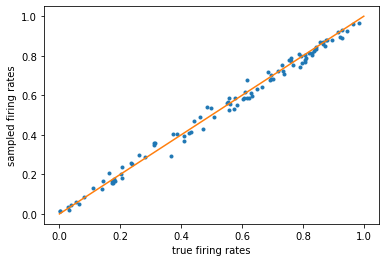

In [3]:
# perform sampling procedure
v_samples, h_samples = rbm.sample(n_samples=1000)

# calculate mean firing rates of the samples
sampled_firing_rates = torch.mean(v_samples, 1).detach()

# plot the true initialized firing rates against the sampled firing rates
plt.plot(firing_rates, sampled_firing_rates, '.')
plt.plot([0, 1], [0, 1])
plt.xlabel('true firing rates')
plt.ylabel('sampled firing rates')
plt.show()

As we can see from this plot, the true and sampled firing rate are highly correlated. Thus, we can conclude the RBM learned (the first-order statistics) correctly.